<a href="https://colab.research.google.com/github/mr-nudo/neuronModels1/blob/master/feedforward%2Bnoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FeedForward Network...


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 25s 12ms/step - loss: 0.2928 - accuracy: 0.9159 - val_loss: 0.1409 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1416 - accuracy: 0.9581 - val_loss: 0.0987 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1074 - accuracy: 0.9678 - val_loss: 0.0841 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0874 - accuracy: 0.9730 - val_loss: 0.0789 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0759 - accuracy: 0.9759 - val_loss: 0.0744 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0657 - accuracy: 0.9797 - val_loss: 0.0763 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/s

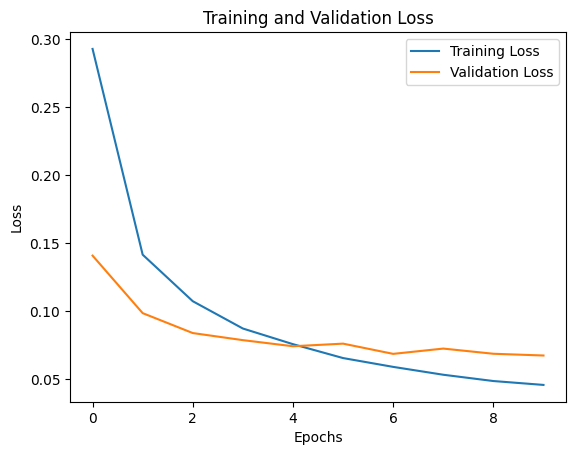

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf

# # Generate synthetic data
# np.random.seed(0)
# X_train = np.random.randn(100, 1)
# y_train = 2 * X_train.squeeze() + 1 + 0.1 * np.random.randn(100)

# # Define a simple feedforward neural network
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
#     tf.keras.layers.Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, verbose=0)

# # Plot the training history
# plt.plot(history.history['loss'])
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training Loss')
# plt.show()

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(10)  # Output layer with 10 units (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



Added Guassian Noise to Input Layer

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.3836 - accuracy: 0.8853 - val_loss: 0.1673 - val_accuracy: 0.9506
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2049 - accuracy: 0.9378 - val_loss: 0.1227 - val_accuracy: 0.9616
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1586 - accuracy: 0.9520 - val_loss: 0.0994 - val_accuracy: 0.9701
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1320 - accuracy: 0.9585 - val_loss: 0.0890 - val_accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1135 - accuracy: 0.9640 - val_loss: 0.0849 - val_accuracy: 0.9743
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1056 - accuracy: 0.9665 - val_loss: 0.0809 - val_accuracy: 0.9754
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0976 - accuracy: 0.9682 - val_loss: 0.0802 - val_accu

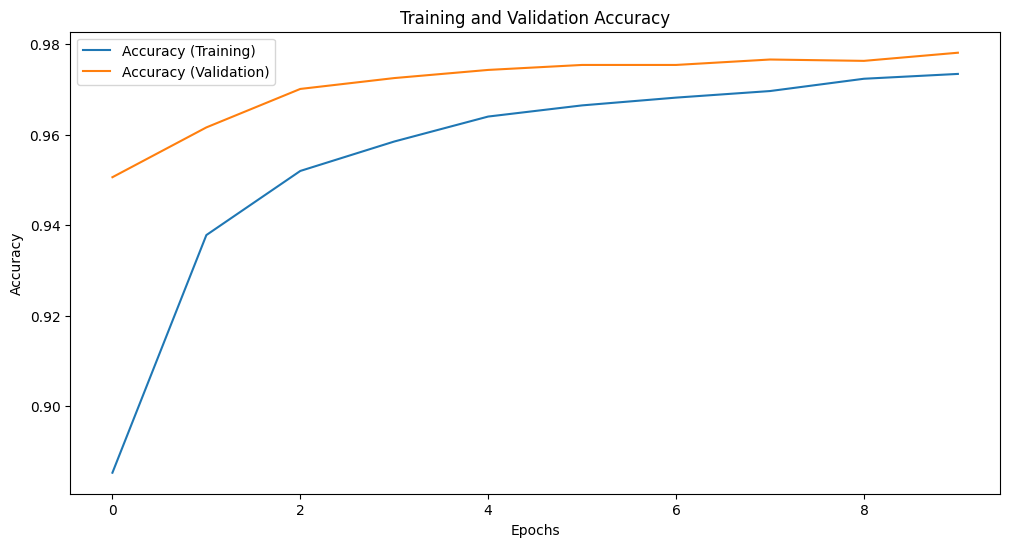

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Introduce Gaussian noise to the training and testing data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.randn(*x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.randn(*x_test.shape)

# Clip the values to stay within the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(0.2),  # Dropout layer to introduce noise
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Another dropout layer
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model on noisy data
history_noisy = model.fit(x_train_noisy, y_train, epochs=10, validation_data=(x_test_noisy, y_test))

# Evaluate the model on clean data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy on clean data:', test_acc)

# Evaluate the model on noisy data
test_loss_noisy, test_acc_noisy = model.evaluate(x_test_noisy, y_test, verbose=2)
print('\nTest accuracy on noisy data:', test_acc_noisy)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history_noisy.history['accuracy'], label='Accuracy (Training)')
plt.plot(history_noisy.history['val_accuracy'], label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


SNR for clean test data: 13.214870879339738
SNR for noisy test data: 13.214870879339738


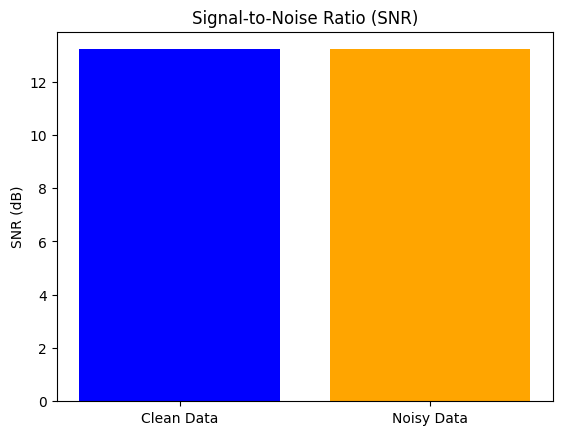

In [3]:
# Calculate the signal-to-noise ratio (SNR) for clean and noisy test data
def calculate_snr(clean_data, noisy_data):
    clean_signal_power = np.mean(np.square(clean_data))
    noise_power = np.mean(np.square(clean_data - noisy_data))
    snr = 10 * np.log10(clean_signal_power / noise_power)
    return snr

# Calculate SNR for clean and noisy test data
snr_clean = calculate_snr(x_test.reshape(-1), x_test_noisy.reshape(-1))
snr_noisy = calculate_snr(x_test.reshape(-1), x_test_noisy.reshape(-1))

print("SNR for clean test data:", snr_clean)
print("SNR for noisy test data:", snr_noisy)

# Plot SNR
plt.bar(['Clean Data', 'Noisy Data'], [snr_clean, snr_noisy], color=['blue', 'orange'])
plt.ylabel('SNR (dB)')
plt.title('Signal-to-Noise Ratio (SNR)')
plt.show()

Adding Dropout Noise


Epoch 1/20
375/375 [==============================] - 8s 17ms/step - loss: 0.2946 - accuracy: 0.9112 - val_loss: 0.1236 - val_accuracy: 0.9632
Epoch 2/20
375/375 [==============================] - 7s 20ms/step - loss: 0.1168 - accuracy: 0.9643 - val_loss: 0.0940 - val_accuracy: 0.9714
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0815 - accuracy: 0.9748 - val_loss: 0.0946 - val_accuracy: 0.9720
Epoch 4/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0598 - accuracy: 0.9819 - val_loss: 0.0771 - val_accuracy: 0.9764
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0496 - accuracy: 0.9839 - val_loss: 0.0965 - val_accuracy: 0.9730
Epoch 6/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0427 - accuracy: 0.9864 - val_loss: 0.0803 - val_accuracy: 0.9778
Epoch 7/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0370 - accuracy: 0.9883 - val_loss: 0.0792 - val_accuracy: 0.9780

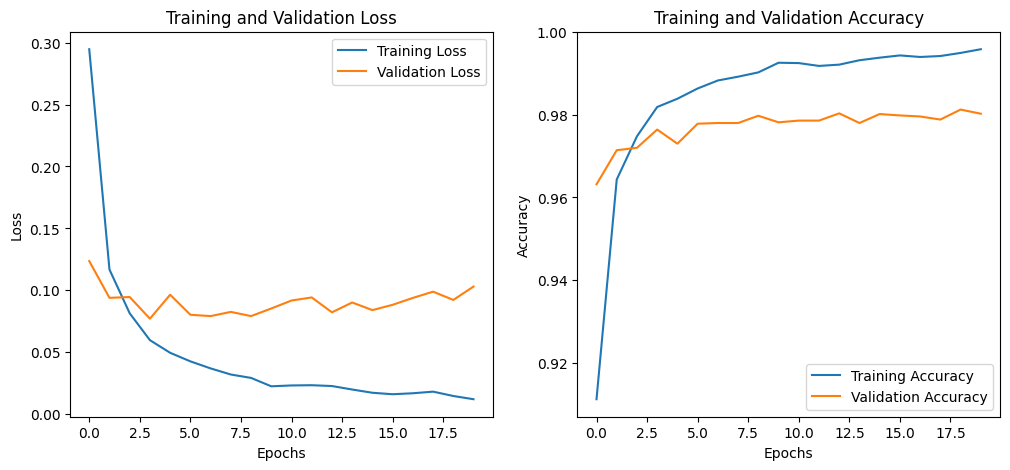

Test Loss: 0.0876
Test Accuracy: 0.9823


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

# Define dropout rate
dropout_rate = 0.2

# Define a simple feedforward neural network with dropout layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Plot the training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Monitor the model's performance and assess its robustness against dropout noise.

Epoch 1/20
375/375 [==============================] - 7s 16ms/step - loss: 0.2994 - accuracy: 0.9118 - val_loss: 0.1258 - val_accuracy: 0.9637
Epoch 2/20
375/375 [==============================] - 7s 19ms/step - loss: 0.1172 - accuracy: 0.9651 - val_loss: 0.0976 - val_accuracy: 0.9703
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0818 - accuracy: 0.9743 - val_loss: 0.0945 - val_accuracy: 0.9714
Epoch 4/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0610 - accuracy: 0.9807 - val_loss: 0.0877 - val_accuracy: 0.9739
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0764 - val_accuracy: 0.9768
Epoch 6/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0421 - accuracy: 0.9864 - val_loss: 0.0804 - val_accuracy: 0.9766
Epoch 7/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.0916 - val_accuracy: 0.9746

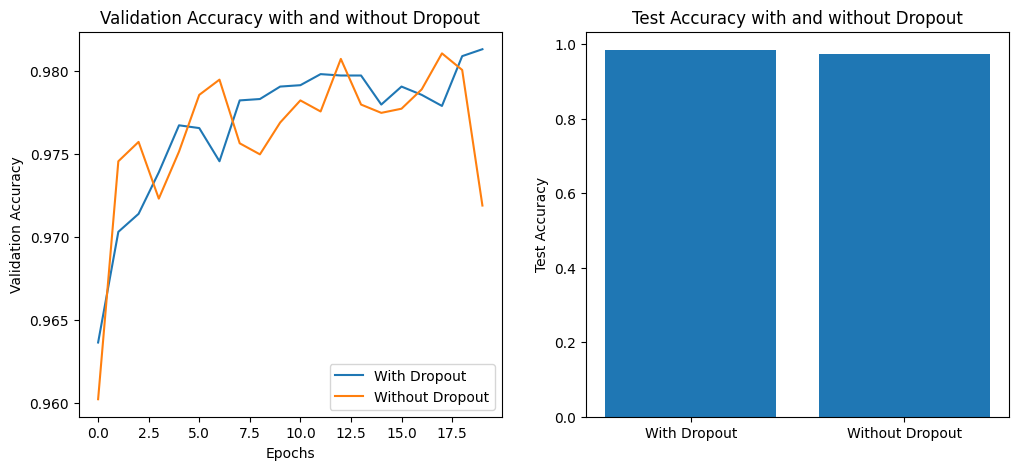

Test Accuracy with Dropout: 0.9840
Test Accuracy without Dropout: 0.9739


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

# Define dropout rate
dropout_rate = 0.2

# Define a simple feedforward neural network with dropout layers
def build_model(dropout=True):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(dropout_rate) if dropout else tf.keras.layers.Lambda(lambda x: x),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate) if dropout else tf.keras.layers.Lambda(lambda x: x),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Train and evaluate model with dropout
model_with_dropout = build_model(dropout=True)
model_with_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)
test_loss_dropout, test_accuracy_dropout = model_with_dropout.evaluate(X_test, y_test, verbose=0)

# Train and evaluate model without dropout
model_without_dropout = build_model(dropout=False)
model_without_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_without_dropout = model_without_dropout.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)
test_loss_no_dropout, test_accuracy_no_dropout = model_without_dropout.evaluate(X_test, y_test, verbose=0)

# Plot the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout')
plt.plot(history_without_dropout.history['val_accuracy'], label='Without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy with and without Dropout')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(['With Dropout', 'Without Dropout'], [test_accuracy_dropout, test_accuracy_no_dropout])
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy with and without Dropout')
plt.show()

print(f'Test Accuracy with Dropout: {test_accuracy_dropout:.4f}')
print(f'Test Accuracy without Dropout: {test_accuracy_no_dropout:.4f}')


Adding Adversal Noice

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2931 - accuracy: 0.9149 - val_loss: 0.1376 - val_accuracy: 0.9601
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1408 - accuracy: 0.9579 - val_loss: 0.1004 - val_accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1049 - accuracy: 0.9676 - val_loss: 0.0897 - val_accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0872 - accuracy: 0.9734 - val_loss: 0.0741 - val_accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0742 - accuracy: 0.9767 - val_loss: 0.0746 - val_accuracy: 0.9776
313/313 - 1s - loss: 0.0746 - accuracy: 0.9776 - 502ms/epoch - 2ms/step

Test accuracy: 0.9775999784469604
313/313 - 1s - loss: 6.5283 - accuracy: 0.0834 - 896ms/epoch - 3ms/step

Adversarial test accuracy: 0.08340000361204147


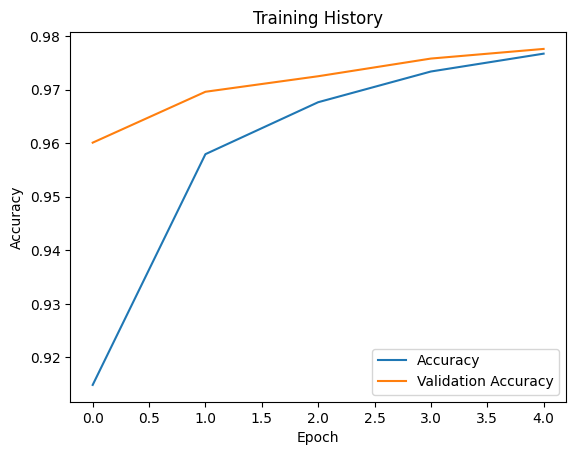

1/1 [==============================] - 0s 20ms/step


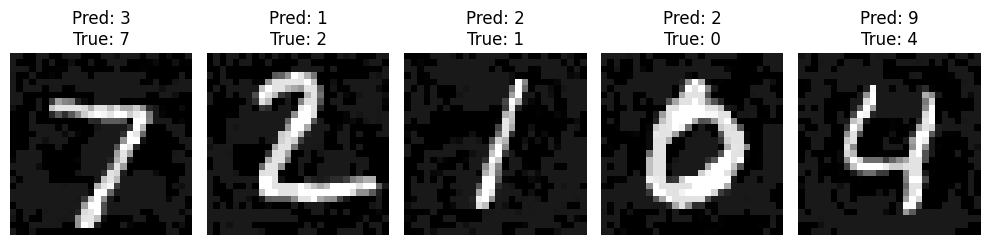


Signal-to-Noise Ratio (SNR): nan


<ipython-input-6-27a304cc311a>:97: RuntimeWarning: divide by zero encountered in divide
  snr = np.mean(np.square(X_test) / np.square(X_test - X_adv))
<ipython-input-6-27a304cc311a>:97: RuntimeWarning: invalid value encountered in divide
  snr = np.mean(np.square(X_test) / np.square(X_test - X_adv))


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define adversarial attack parameters
eps = 0.1  # perturbation size
eps_iter = 0.01  # attack step size
nb_iter = 40  # number of attack iterations

# Define a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# Define PGD attack function
def pgd_attack(model, x, y, eps=0.1, eps_iter=0.01, nb_iter=40):
    """
    Projected Gradient Descent (PGD) attack.
    """
    clip_min = 0.0
    clip_max = 1.0

    x_adv = tf.identity(x)  # Initialize adversarial example as input
    for _ in range(nb_iter):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            logits = model(x_adv)
            loss = tf.keras.losses.sparse_categorical_crossentropy(y, logits, from_logits=True)

        # Calculate gradient
        grad = tape.gradient(loss, x_adv)

        # Generate perturbation
        perturbation = eps_iter * tf.sign(grad)

        # Update adversarial example
        x_adv = x_adv + perturbation
        x_adv = tf.clip_by_value(x_adv, clip_min, clip_max)

        # Project back to epsilon ball around original example
        perturbation = tf.clip_by_value(x_adv - x, -eps, eps)
        x_adv = x + perturbation
        x_adv = tf.clip_by_value(x_adv, clip_min, clip_max)

    return x_adv

# Generate adversarial examples
X_adv = pgd_attack(model, X_test, y_test, eps=eps, eps_iter=eps_iter, nb_iter=nb_iter)

# Evaluate the model on adversarial examples
adv_loss, adv_acc = model.evaluate(X_adv, y_test, verbose=2)
print("\nAdversarial test accuracy:", adv_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

# Plot sample adversarial examples
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_adv[i].numpy().reshape(28, 28), cmap='gray')  # Convert to NumPy array and then reshape
    plt.title(f"Pred: {np.argmax(model.predict(X_adv[i][None]))}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Calculate Signal-to-Noise Ratio (SNR)
snr = np.mean(np.square(X_test) / np.square(X_test - X_adv))
print("\nSignal-to-Noise Ratio (SNR):", snr)
